# Miscellaneous

## 1 - Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Kalman Filter

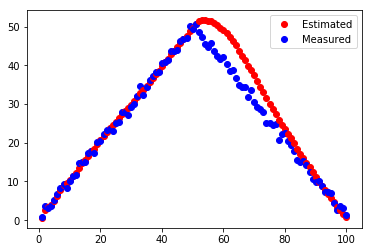

In [2]:
# Kalman Filter, Z from 1 to 50, and then 50 to 1
Z = np.append(np.arange(1, 51), np.arange(50, 0, -1), axis=0)
noise = np.random.randn(1, 100)
Z = Z + noise

X = np.zeros((2,1))
P = np.eye(2, dtype=int)
F = np.array([[1, 1],[0, 1]])
Q = np.array([[0.0001, 0],[0, 0.0001]])
H = np.array([[1, 0]])
R = 1

for i in range(100):
    X_ = np.dot(F, X)
    P_ = np.dot(np.dot(F, P), F.T) + Q
    K = np.dot(P_, H.T) / (np.dot(np.dot(H, P_), H.T)+R)
    X = X_ + (K*(Z[:,i]-np.dot(H, X_)))
    P = np.dot((np.eye(2)-np.dot(K, H)), P_)
    
    line_up, = plt.plot(i+1, X[0,:], 'ro', label='Estimated')
    line_down, = plt.plot(i+1, Z[:,i], 'bo', label='Measured')
plt.legend(handles=[line_up, line_down])
plt.show()

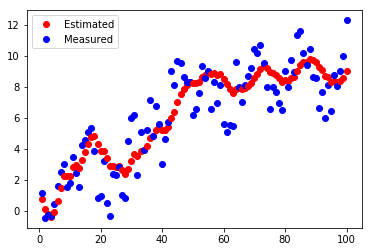

In [3]:
# Kalman Filter, Z +1 or -1 in random
Z_r = 0.17*np.random.randn(1, 100) + 0.5
Z_p = (Z_r>=0.5)
Z_m = (Z_r<0.5)*(-1)
Z_step = Z_p + Z_m
Z = np.cumsum(Z_step)
noise = np.random.randn(1, 100)
Z = Z + noise

X = np.zeros((2,1))
P = np.eye(2, dtype=int)
F = np.array([[1, 1],[0, 1]])
Q = np.array([[0.0001, 0],[0, 0.0001]])
H = np.array([[1, 0]])
R = 1

for i in range(100):
    X_ = np.dot(F, X)
    P_ = np.dot(np.dot(F, P), F.T) + Q
    K = np.dot(P_, H.T) / (np.dot(np.dot(H, P_), H.T)+R)
    X = X_ + (K*(Z[:,i]-np.dot(H, X_)))
    P = np.dot((np.eye(2)-np.dot(K, H)), P_)
    
    line_up, = plt.plot(i+1, X[0,:], 'ro', label='Estimated')
    line_down, = plt.plot(i+1, Z[:,i], 'bo', label='Measured')
plt.legend(handles=[line_up, line_down])
plt.show()